In [1]:
import cv2 # tested with the 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1. Basic Image Operations
## 1.1 Image Read/Write

In [2]:
# a) read image.
def my_imread(imagepath):
    
    image = cv2.imread(imagepath) # Read the image from imagepath.
    return image

IMG_NAME = '3096.jpg' # Choose an image filename from "data/img/"
IMG_PATH = os.path.join('data/img/', IMG_NAME)
image = my_imread(IMG_PATH)

In [3]:
# Optional: uncomment those lines to display the image using cv2.
'''
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('image', image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

Tried to use cv2 to display. It could open a window to show the image but it turned out that I couldn't close it.

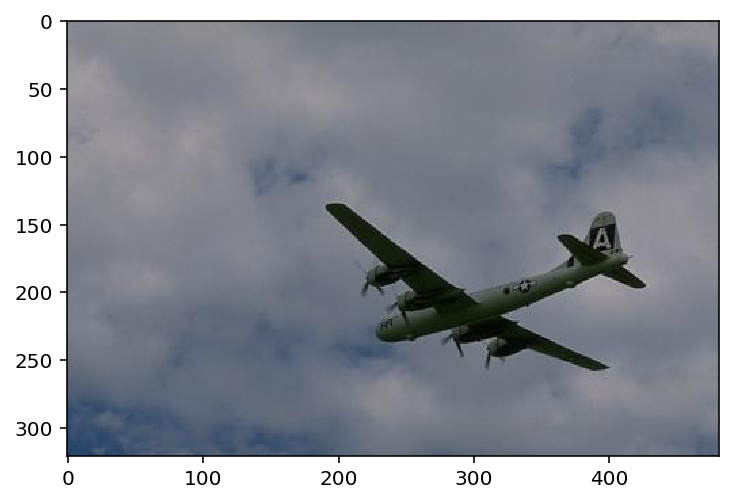

In [4]:
# b) Display the correct color in RGB 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

In [5]:
# c) Write the same image in the correct color and Grayscale and save as
# "problem1_rgb.jpg" and "problem1_gray.jpg".
RGB_FILENAME = "problem1_color.jpg"
GRAY_FILENAME = "problem1_gray.jpg"
cv2.imwrite(RGB_FILENAME, image) # save the image in the correct color format.
cv2.imwrite(GRAY_FILENAME, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) # save the image in grayscale format.
# Once the two images have been generated in the current directory,
# run the next block to show your results.

True

### Display saved color image from current folder.
!["color"](problem1_color.jpg?arg)

### Display saved grayscale image from current folder.
!["gray"](problem1_gray.jpg?arg)

## 1.2 Image Smoothing

In [6]:
# Optional: plots an image
def plot_helper(rgb_img, title):
    plt.figure(figsize=(15, 15)) # the figure size can be adjusted to make sure the images are clear for grading.
    plt.subplot(111), 
    plt.imshow(rgb_img), 
    plt.title(title)
    plt.xticks([]), 
    plt.yticks([])
    plt.show()

kernel sizes are: [5, 9, 15]


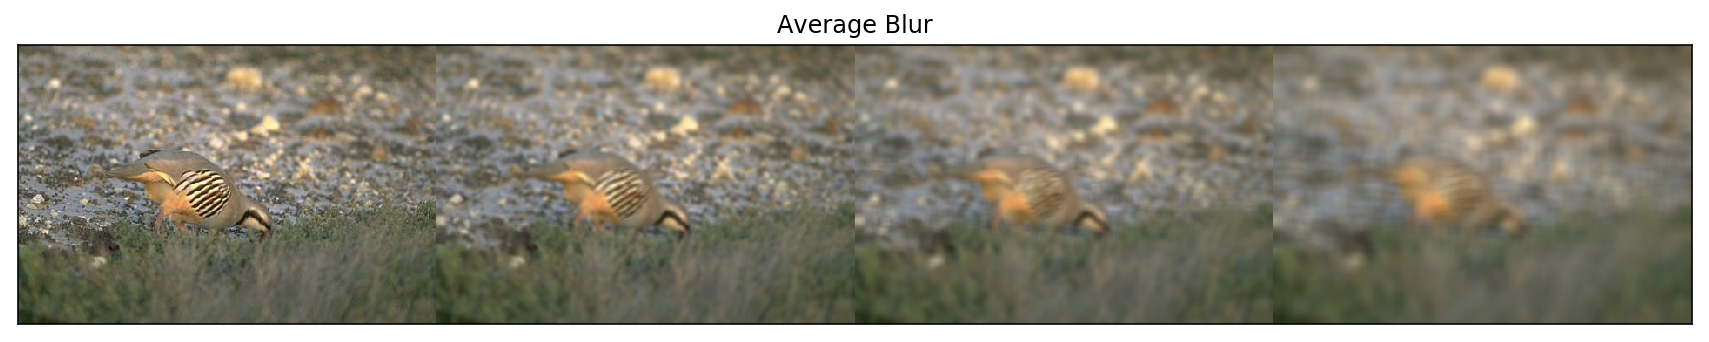

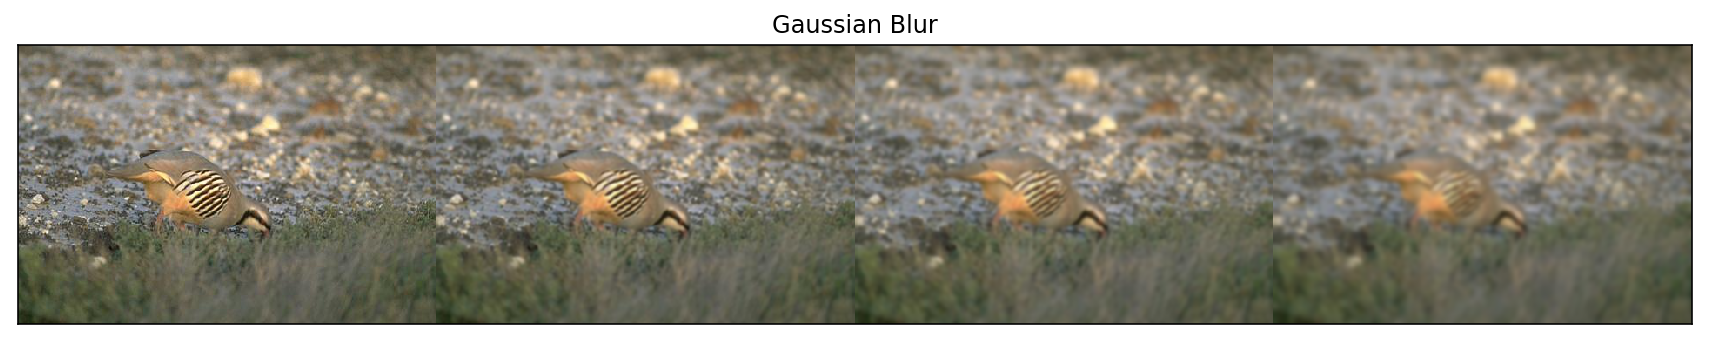

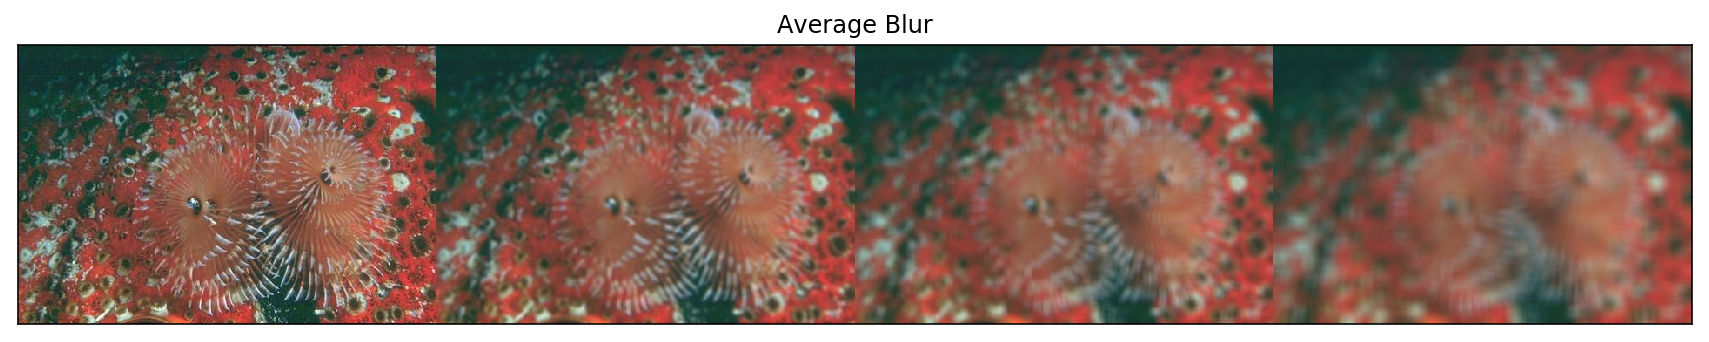

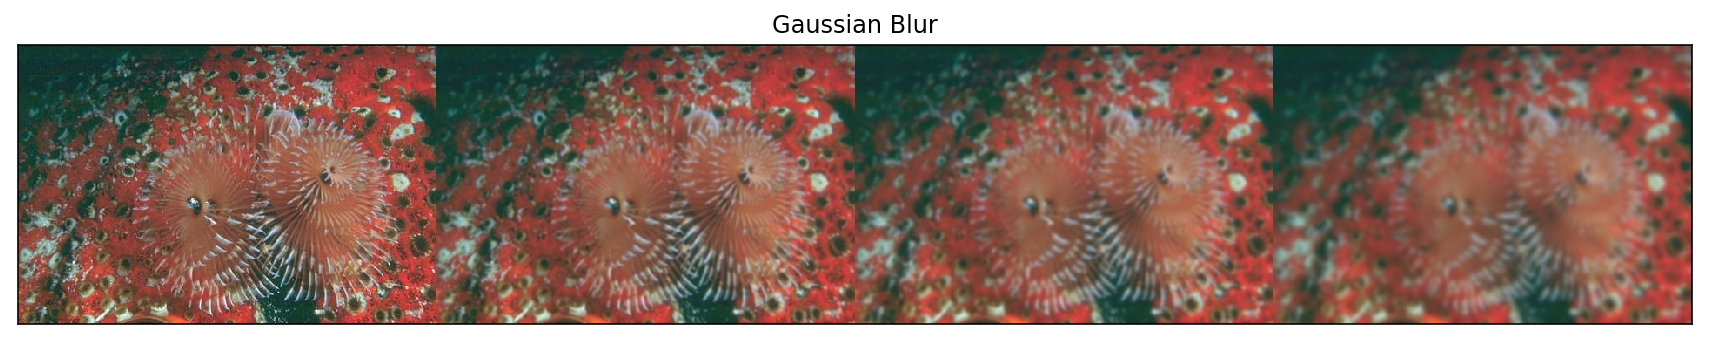

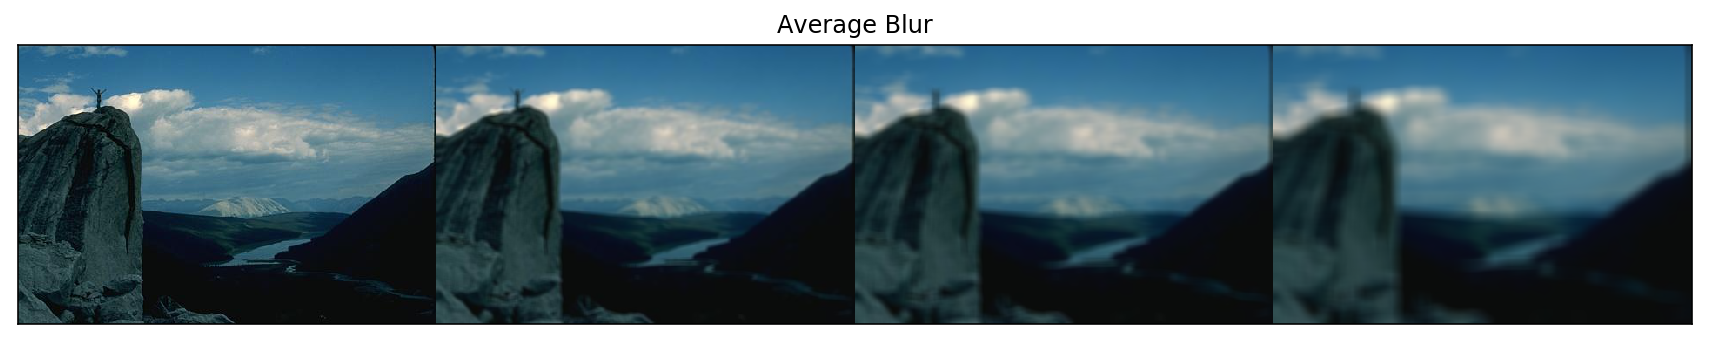

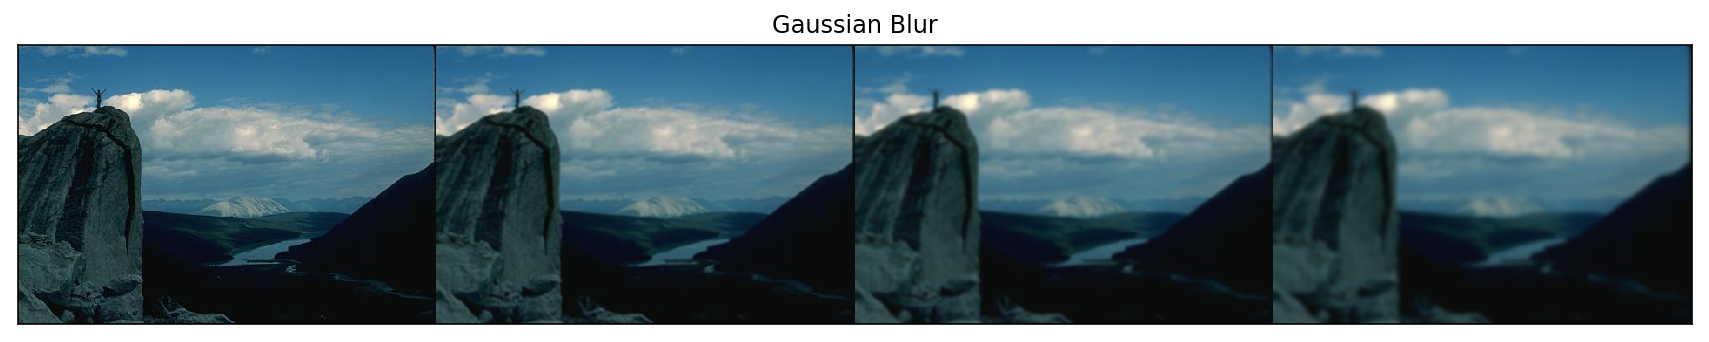

In [7]:
IMAGES = ['8023.jpg', '12084.jpg', '14037.jpg'] # choose 3 images from "data/img"
KERNEL_SIZES = [5,9,15] # choose at least 3 different filter sizes
print ("kernel sizes are:", KERNEL_SIZES)
for i in range(len(IMAGES)):
    imagepath = os.path.join('data/img/', IMAGES[i])
    image = my_imread(imagepath)
    avg_blurs = [image]
    gaus_blurs = [image]
    for j in range(len(KERNEL_SIZES)):
        kernel_size = KERNEL_SIZES[j]
        # a) average smoothing
        avg_blur = cv2.blur(image,(kernel_size,kernel_size))
        avg_blurs.append(avg_blur)
        # b) gaussian smoothing
        gaus_blur = cv2.GaussianBlur(image,(kernel_size,kernel_size),0)
        gaus_blurs.append(gaus_blur)
    avg_stack = np.hstack(avg_blurs)
    gaus_stack = np.hstack(gaus_blurs)
    # Optional: you could choose to use plot_helper to plot avg_stack and gaus_stack.
    # Make sure they are in RGB before using plot_helper.
    plot_helper(cv2.cvtColor(avg_stack, cv2.COLOR_BGR2RGB), "Average Blur")
    plot_helper(cv2.cvtColor(gaus_stack, cv2.COLOR_BGR2RGB), "Gaussian Blur")
    

### c) What do you observe? (Please briefly answer this question in this block)

1. The larger the kernel is, the more visual information it loses and the more obvious the blur is.
2. Compared with average blur, gaussian blur can perserve more visual information when using the same kernel size.

## 1.3 Denoising

In [8]:
import glob
imagepaths = glob.glob('data/snp/*.jpg')

Filter size 9


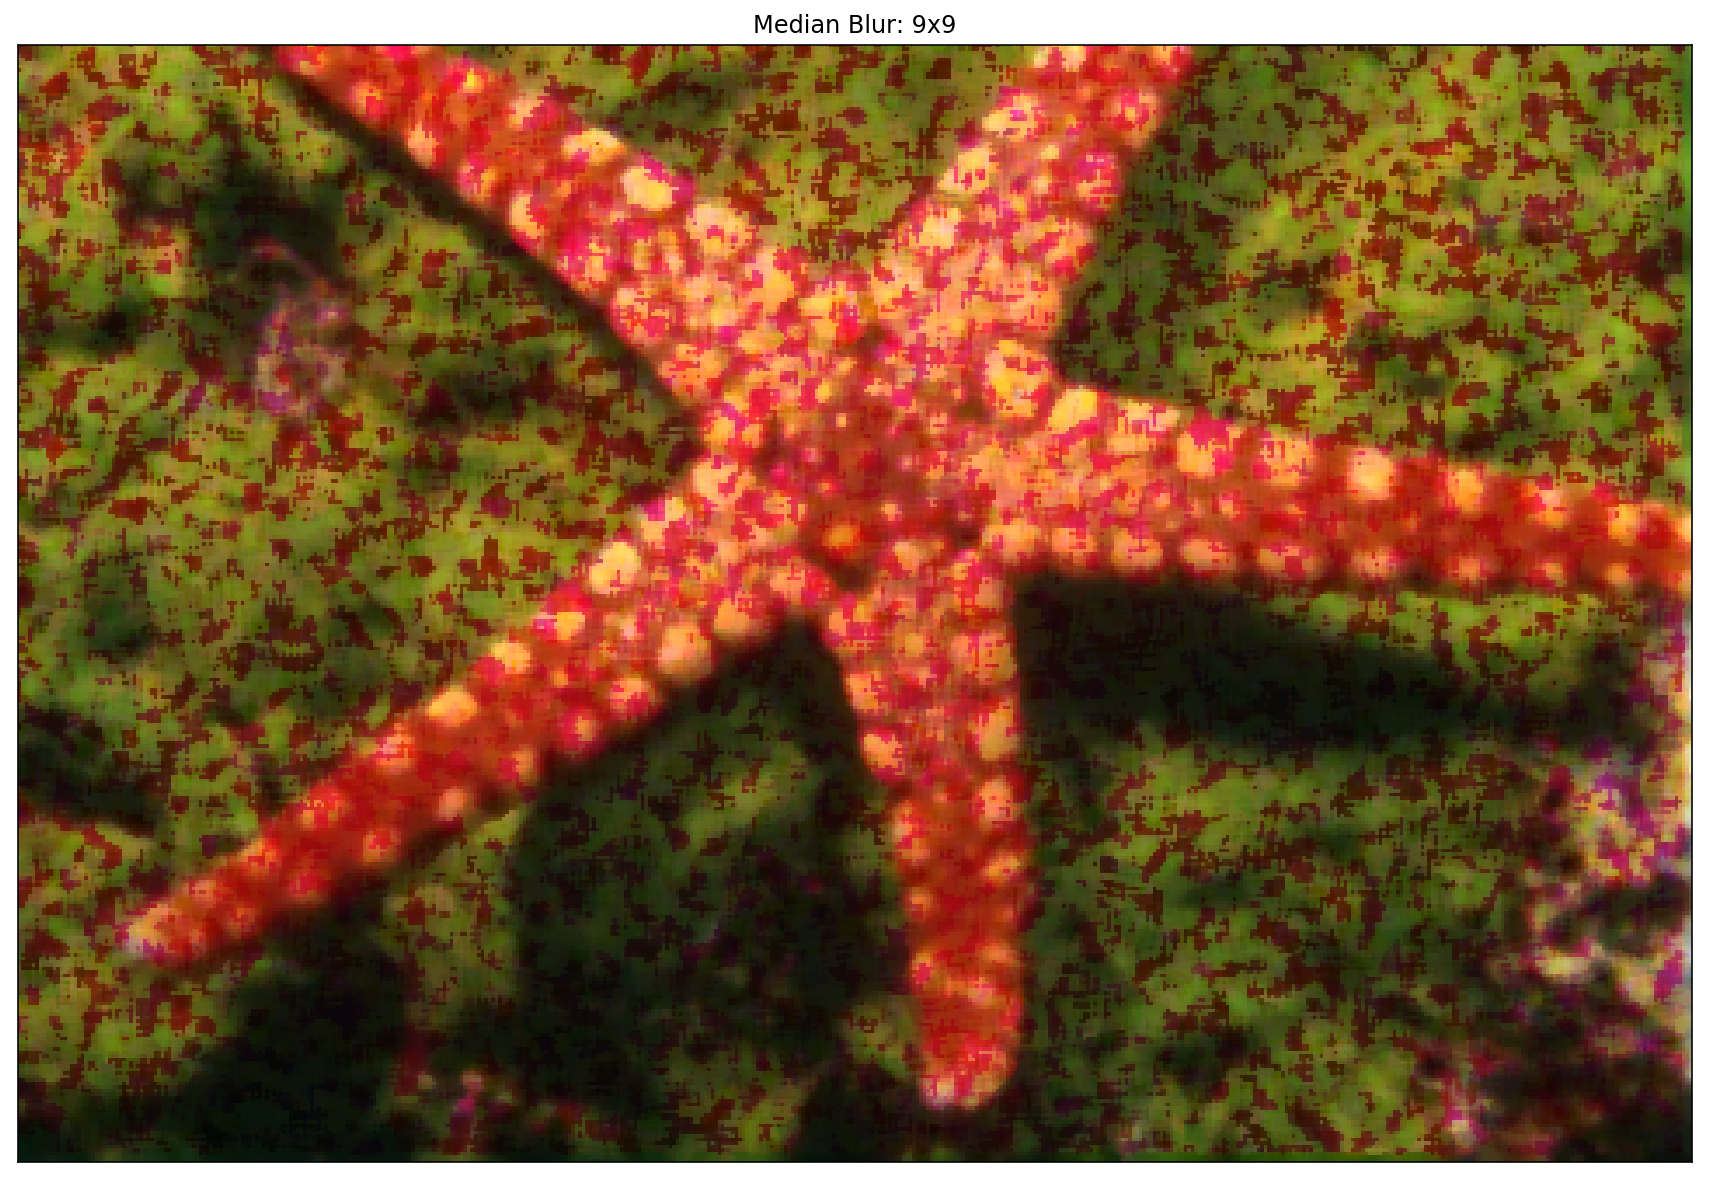

Filter size 9


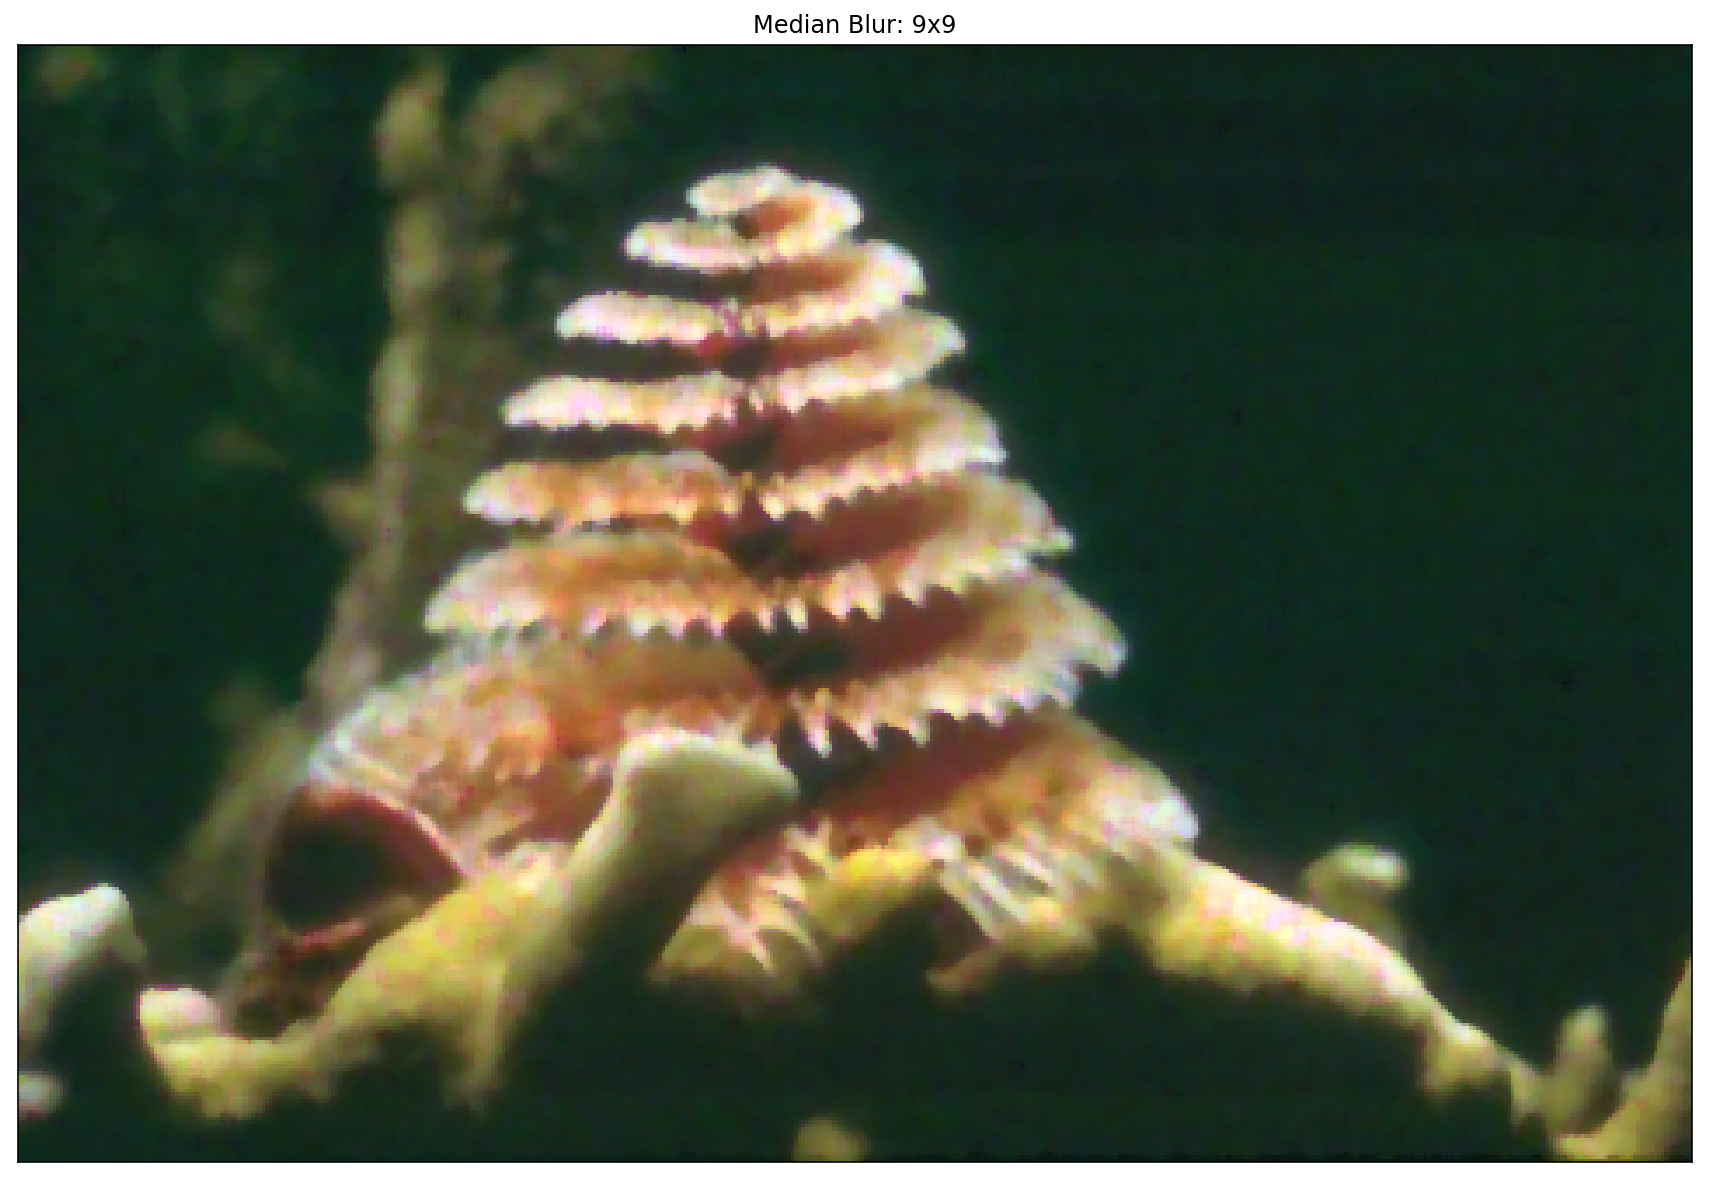

Filter size 9


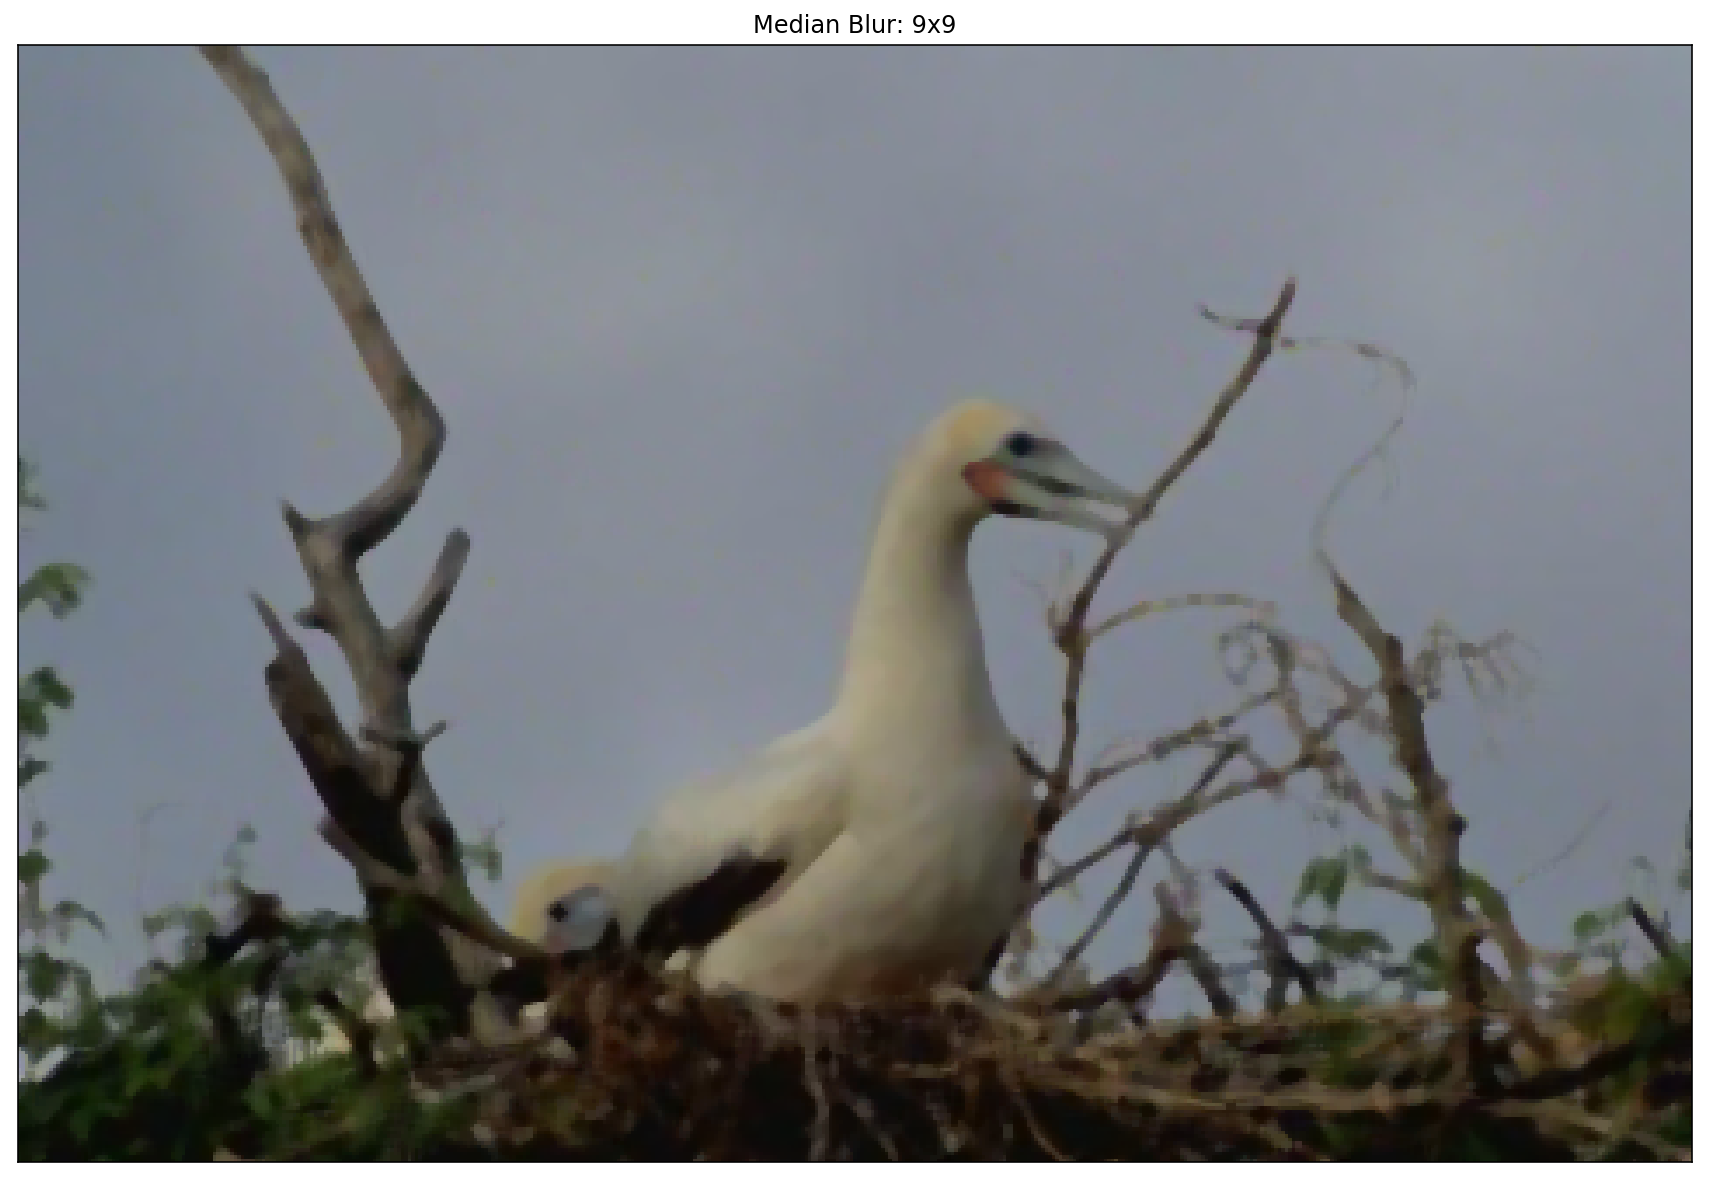

Filter size 9


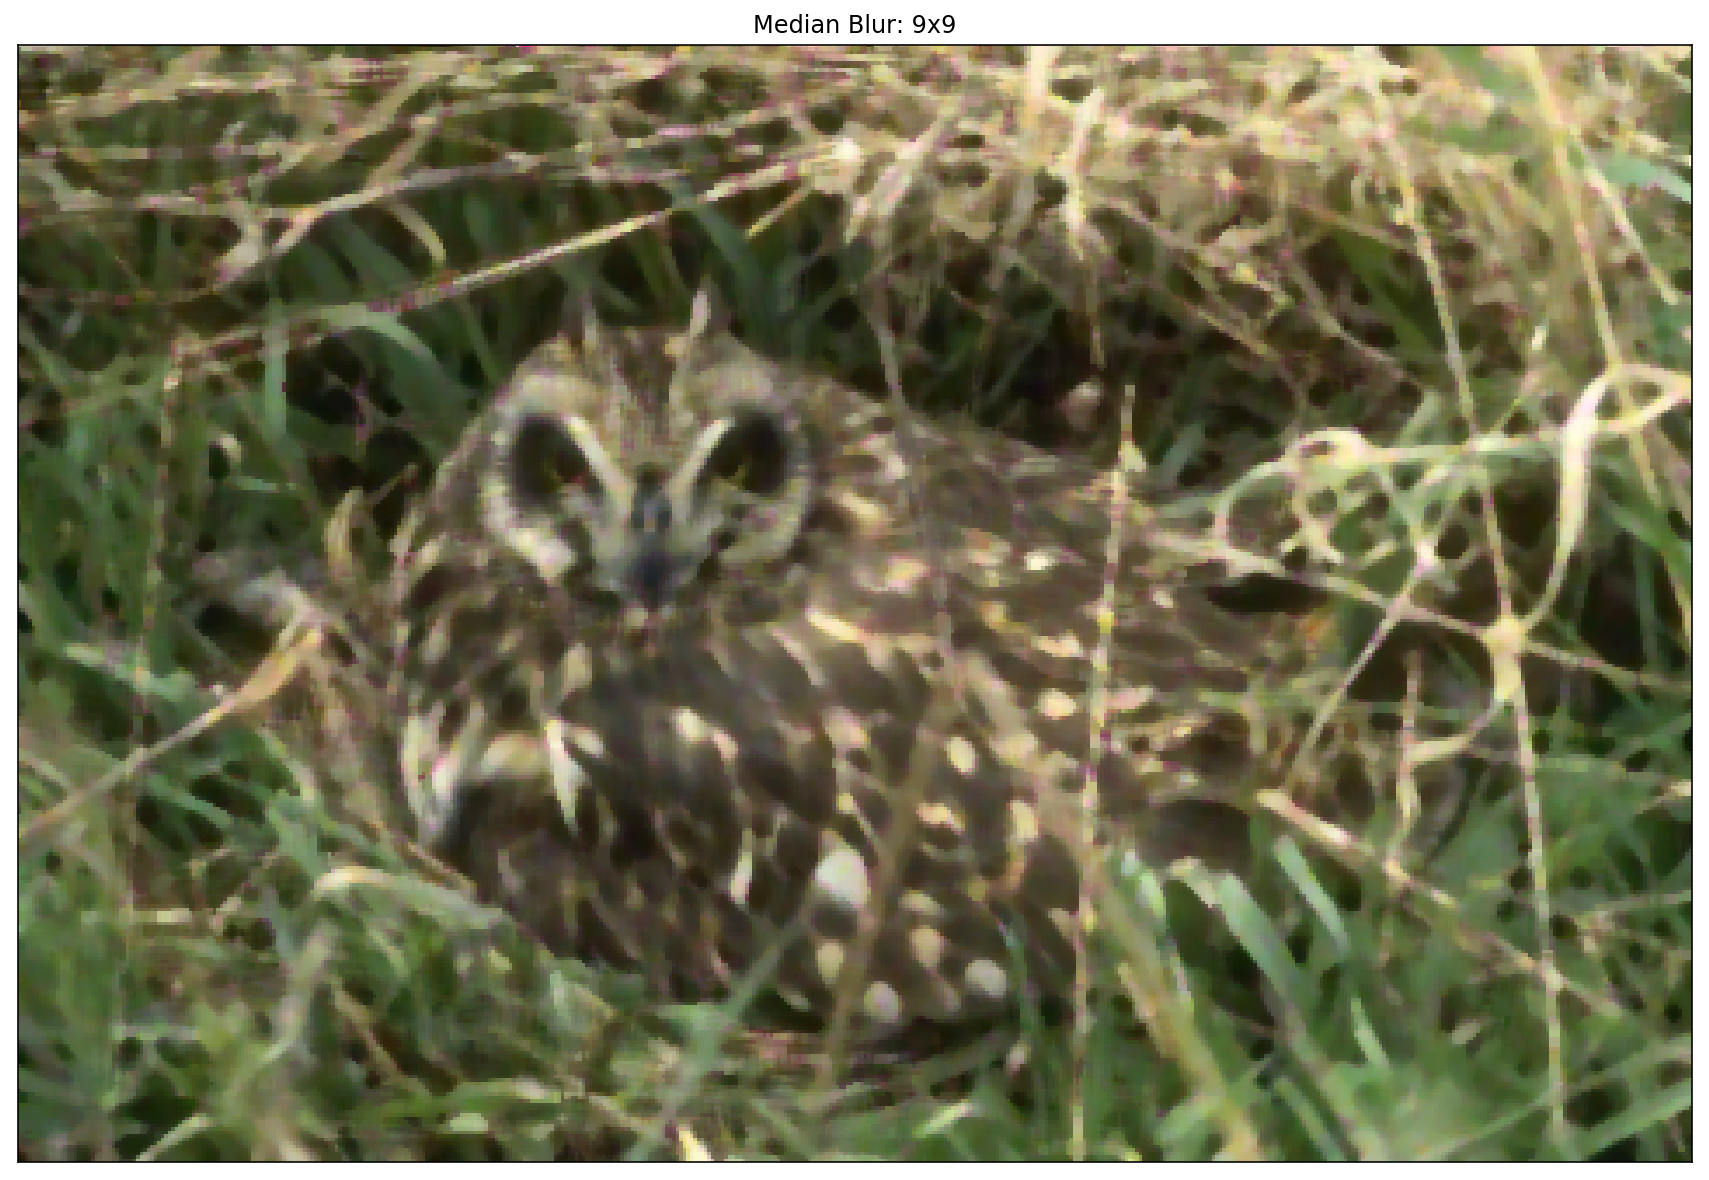

Filter size 9


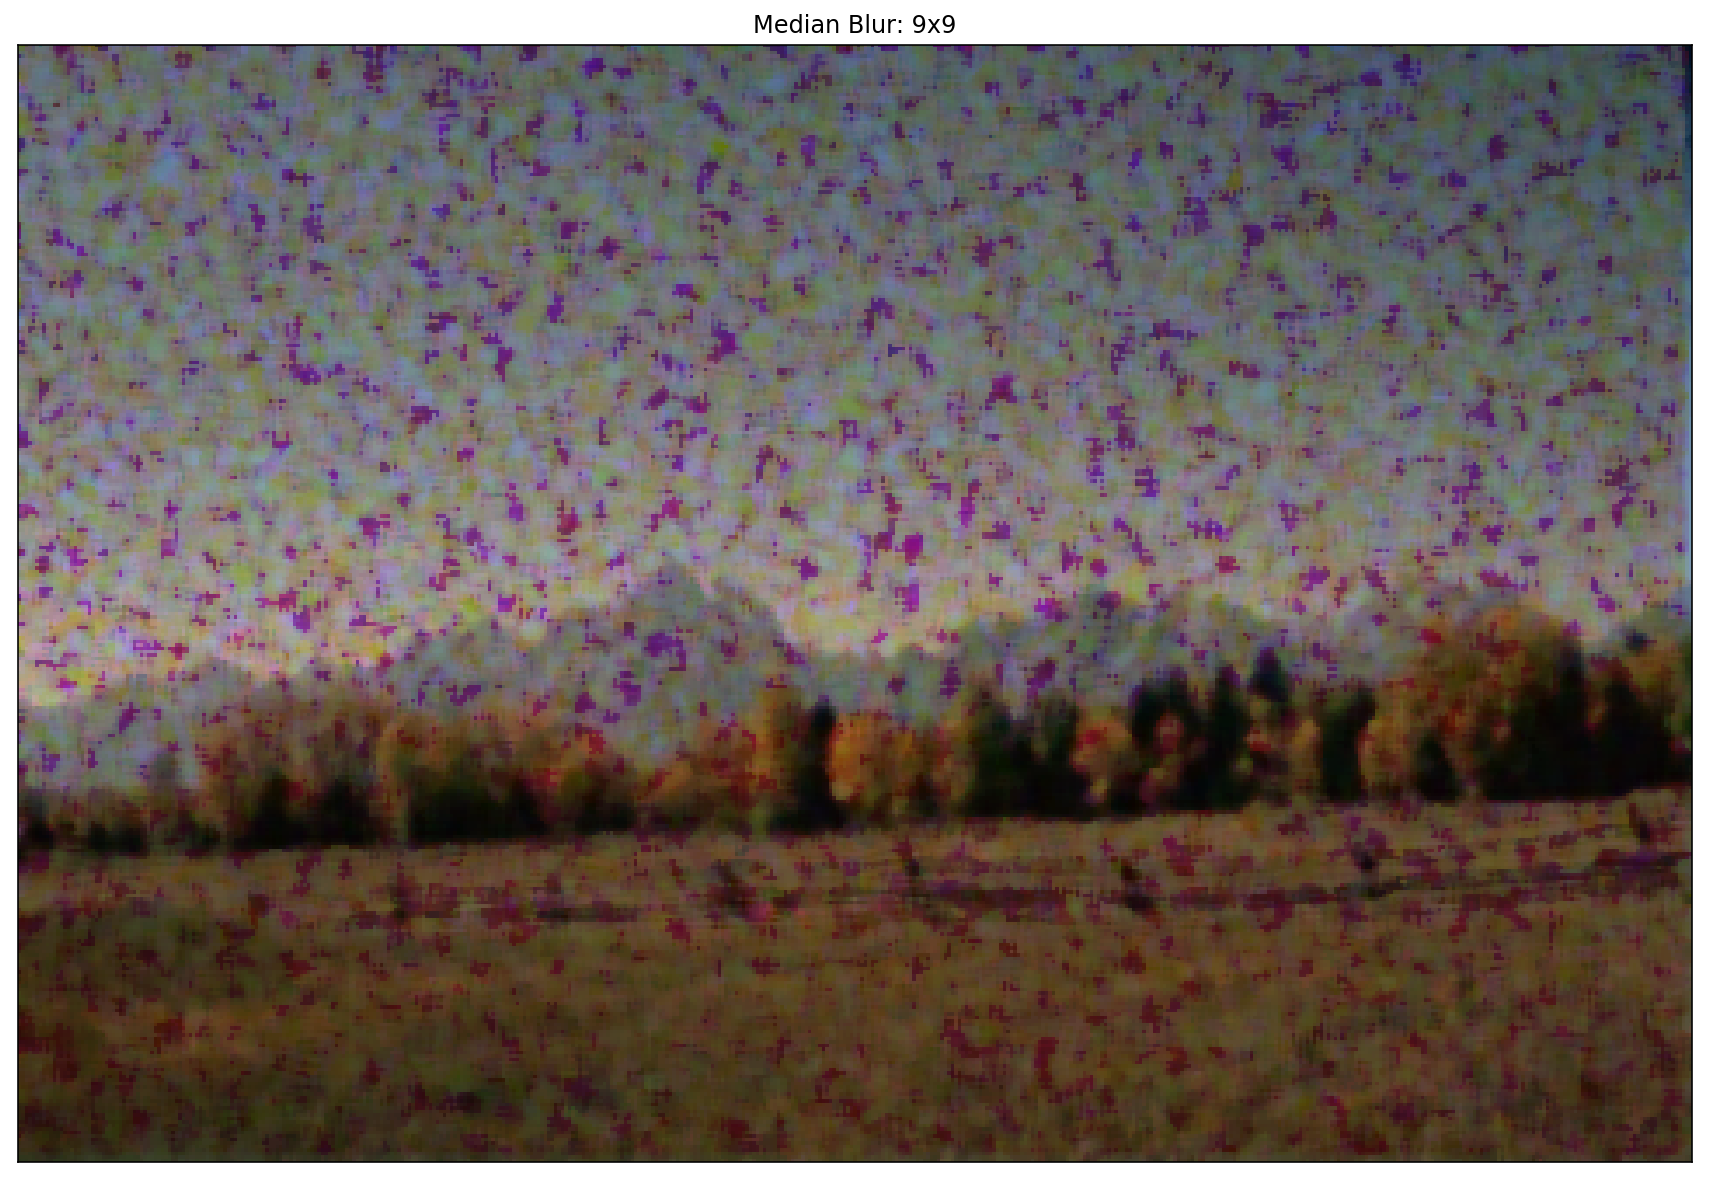

In [9]:
MEDIAN_FILTERS = [9,9,9,9,9] # Filter sizes for each image.
for i, imagepath in enumerate(imagepaths):
    image = my_imread(imagepath)
    median = cv2.medianBlur(image,5) # Apply the median filter on this image.
    print ("Filter size", MEDIAN_FILTERS[i])
    stack = np.hstack((image, median))
    # Optional: you could choose to use plot_helper to plot stacked image.
    # Make sure it is in RGB before using plot_helper.
    plot_helper(cv2.cvtColor(median, cv2.COLOR_BGR2RGB), 'Median Blur: %dx%d'%(MEDIAN_FILTERS[i], MEDIAN_FILTERS[i]))